In [2]:
import pandas as pd
import os

# List files in current directory to verify the path
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current directory: /home/u762545/Thesis/Notebooks
Files in directory: ['Yaboo_Nasdaq.ipynb', 'FNS Dataset Preprocess.ipynb', 'untitled.txt', '.ipynb_checkpoints']


In [18]:
#Checking the first 100 rows and Selecting the columns - > check for missing data 

import pandas as pd

# Load the first 100 rows of the dataset
df = pd.read_csv('/home/u762545/Thesis/Data/FNSPID_FULL_DATASET.csv', nrows=100)
print(df.columns)

# Select only the columns we want to check
columns_to_check = ['Date', 'Article_title', 'Article', 'Stock_symbol']
df_subset = df[columns_to_check]

# Check for missing values
missing_data = df_subset.isnull().sum()

# Display results
print("Missing values in first 100 rows:")
print(missing_data)

# Optional: Show rows where any of these columns are missing
rows_with_missing = df_subset[df_subset.isnull().any(axis=1)]
print("\nRows with missing data:")
print(rows_with_missing)

Index(['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url',
       'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary',
       'Textrank_summary', 'Lexrank_summary'],
      dtype='object')
Missing values in first 100 rows:
Date             0
Article_title    0
Article          0
Stock_symbol     0
dtype: int64

Rows with missing data:
Empty DataFrame
Columns: [Date, Article_title, Article, Stock_symbol]
Index: []


In [ ]:
import pandas as pd
import os
from tqdm import tqdm  # For progress tracking

# Configuration
input_file = "/home/u762545/Thesis/Data/FNSPID_FULL_DATASET.csv"
output_file = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"
columns_to_keep = ["Date", "Article_title", "Article", "Stock_symbol"]
chunk_size = 100000  # Adjust based on your system's memory
start_date = "2019-01-01"

# Nasdaq-100 tickers (complete list)
nasdaq_100_tickers = [
    "AAPL", "MSFT", "GOOGL", "GOOG", "NVDA", "TSLA", "META", "AMZN", "ADBE",
    "PYPL", "NFLX", "INTC", "CSCO", "QCOM", "AMD", "ASML", "TXN", "AVGO",
    "MRNA", "ORCL", "PEP", "COST", "TMUS", "AMGN", "HON", "SBUX", "GILD",
    "ISRG", "MDLZ", "BKNG", "ADI", "VRTX", "LRCX", "REGN", "PDD", "KDP",
    "ABNB", "FISV", "MELI", "CHTR", "AEP", "ADP", "CDNS", "PANW", "DXCM",
    "SNPS", "MU", "MAR", "FTNT", "KLAC", "ROP", "CTAS", "WDAY", "PAYX",
    "IDXX", "MNST", "ODFL", "ANSS", "PCAR", "EXC", "CEG", "CSGP", "XEL",
    "AZN", "FAST", "VRSK", "DLTR", "EA", "WBD", "ROST", "EBAY", "SGEN",
    "BIIB", "SIRI", "CTSH", "TEAM", "LCID", "ILMN", "JD", "ZS", "CRWD",
    "MRVL", "OKTA", "DDOG", "BIDU", "DOCU", "LULU", "VRSN", "NXPI"
]

# Convert to uppercase for case-insensitive matching
nasdaq_100_tickers = [ticker.upper() for ticker in nasdaq_100_tickers]

def is_nasdaq_related(row):
    """Check if article is Nasdaq-100 related through stock symbol or article content"""
    if pd.notna(row['Stock_symbol']) and str(row['Stock_symbol']).upper() in nasdaq_100_tickers:
        return True
    if pd.notna(row['Article']):
        article_upper = row['Article'].upper()
        return any(ticker in article_upper for ticker in nasdaq_100_tickers)
    return False

def preprocess_chunk(chunk):
    """Process each chunk of data"""
    # Convert date and filter by date range
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk[chunk['Date'] >= start_date]
    
    # Filter Nasdaq-100 related articles
    mask = chunk.apply(is_nasdaq_related, axis=1)
    return chunk[mask][columns_to_keep]

# Initialize output file (write header only once)
first_chunk = True

# Process the large file in chunks
for chunk in tqdm(pd.read_csv(input_file, usecols=columns_to_keep, chunksize=chunk_size)):
    processed_chunk = preprocess_chunk(chunk)
    
    if not processed_chunk.empty:
        processed_chunk.to_csv(
            output_file,
            mode='a',
            header=first_chunk,
            index=False
        )
        first_chunk = False

print(f"\n✅ Preprocessing complete! Output saved to: {output_file}")

# Verification
if os.path.exists(output_file):
    print("\nFinal output summary:")
    result = pd.read_csv(output_file)
    print(f"Total articles: {len(result)}")
    print("Date range:", result['Date'].min(), "to", result['Date'].max())
    print("\nSample data:")
    print(result.head())
else:
    print("❌ Error: Output file was not created")

38it [10:00,  4.97s/it]/usr/local/anaconda3/lib/python3.9/site-packages/tqdm/std.py:1195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
47it [10:35,  4.83s/it]/usr/local/anaconda3/lib/python3.9/site-packages/tqdm/std.py:1195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
65it [12:09,  2.98s/it]/usr/local/anaconda3/lib/python3.9/site-packages/tqdm/std.py:1195: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
156it [17:06,  6.58s/it]



✅ Preprocessing complete! Output saved to: /home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv

Final output summary:


In [1]:
import pandas as pd

# Configuration
input_file = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"
sample_size = 1000  # Number of rows to check

# Safely read only the first N rows
try:
    # Read sample with explicit dtype handling to avoid warnings
    sample = pd.read_csv(
        input_file,
        nrows=sample_size,
        dtype={'Stock_symbol': str},  # Force string type for symbol column
        low_memory=False
    )
    
    # Basic validation
    print(f"✅ Successfully read {len(sample)} rows from: {input_file}")
    print("\n=== File Structure ===")
    print(f"Columns: {list(sample.columns)}")
    print(f"Total rows in sample: {len(sample)}")
    
    print("\n=== Date Range ===")
    sample['Date'] = pd.to_datetime(sample['Date'], errors='coerce')
    print(f"From: {sample['Date'].min()}")
    print(f"To: {sample['Date'].max()}")
    
    print("\n=== Nasdaq-100 Ticker Coverage ===")
    print("Top 10 mentioned stock symbols:")
    print(sample['Stock_symbol'].value_counts().head(10))
    
    print("\n=== Sample Content ===")
    pd.set_option('display.max_colwidth', 60)  # Prevent text overflow
    print(sample.head(3))
    
except Exception as e:
    print(f"❌ Error reading file: {e}")
    print("\nDebugging tips:")
    print("1. Check file exists: import os; print(os.path.exists(input_file))")
    print("2. Verify file size: os.path.getsize(input_file)")

✅ Successfully read 1000 rows from: /home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv

=== File Structure ===
Columns: ['Date', 'Article_title', 'Article', 'Stock_symbol']
Total rows in sample: 1000

=== Date Range ===
From: 2021-08-05 00:00:00+00:00
To: 2023-12-16 23:00:00+00:00

=== Nasdaq-100 Ticker Coverage ===
Top 10 mentioned stock symbols:
AA    621
A     379
Name: Stock_symbol, dtype: int64

=== Sample Content ===
                       Date  \
0 2023-12-16 23:00:00+00:00   
1 2023-12-12 00:00:00+00:00   
2 2023-12-12 00:00:00+00:00   

                                                 Article_title  \
0           Interesting A Put And Call Options For August 2024   
1  Wolfe Research Initiates Coverage of Agilent Technologie...   
2            Agilent Technologies Reaches Analyst Target Price   

                                                       Article Stock_symbol  
0  Investors in Agilent Technologies, Inc. (Symbol: A) saw ...            A  
1  Fintel reports that 

In [2]:
#EDA

import pandas as pd

# File path
file_path = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"

# Smaller chunk size to avoid memory issues
chunk_size = 50_000
max_chunks = 2  # Only load the first 2 chunks

chunks = []

# Read limited chunks and drop nulls
for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
    chunk = chunk.dropna()
    chunks.append(chunk)
    if i + 1 >= max_chunks:
        break

# Combine into one DataFrame
df = pd.concat(chunks, ignore_index=True)

# Display basic info
print("🧾 Dataset Info:")
print(df.info())

print("\n🔍 Sample Rows:")
print(df.head())

# Null value check
print("\n🚨 Null Values per Column:")
print(df.isnull().sum())

# Unique values in key columns
for col in ['Date', 'Stock_symbol', 'Article_title']:
    if col in df.columns:
        print(f"\n🔑 Unique values in '{col}':")
        print(df[col].dropna().unique()[:10])

# Convert 'Date' to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Basic EDA
print("\n📊 Articles per Ticker:")
print(df['Stock_symbol'].value_counts().head(10))

print("\n📅 Articles per Day:")
print(df['Date'].value_counts().sort_index().head(10))

# Headline length distribution
df['headline_length'] = df['Article_title'].apply(lambda x: len(str(x)))
print("\n✏️ Headline Length Stats:")
print(df['headline_length'].describe())

# Show full content for 3 random articles
pd.set_option('display.max_colwidth', None)
print("\n📚 Full View of 3 Random Articles:")
print(df.sample(3)[['Date', 'Stock_symbol', 'Article_title', 'Article']])


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           100000 non-null  object
 1   Article_title  100000 non-null  object
 2   Article        100000 non-null  object
 3   Stock_symbol   100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB
None

🔍 Sample Rows:
                        Date  \
0  2023-12-16 23:00:00+00:00   
1  2023-12-12 00:00:00+00:00   
2  2023-12-12 00:00:00+00:00   
3  2023-12-07 00:00:00+00:00   
4  2023-12-07 00:00:00+00:00   

                                       Article_title  \
0  Interesting A Put And Call Options For August ...   
1  Wolfe Research Initiates Coverage of Agilent T...   
2  Agilent Technologies Reaches Analyst Target Price   
3  Agilent (A) Enhances BioTek Cytation C10 With ...   
4  Pre-Market Most Active for Dec 7, 2023 : SQQQ,...   

                    

In [4]:
#EDA

import pandas as pd

# === Settings ===
file_path = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"
output_file = "FNS_CLEANED_FULL.csv"
chunk_size = 100_000

# === Initialize counters and containers ===
total_rows = 0
articles_per_day_dict = {}
min_date, max_date = None, None
first_chunk = True

# === Process dataset in chunks ===
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Drop rows with any nulls
    chunk = chunk.dropna()

    # Convert 'Date' to datetime
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])  # drop if conversion failed

    # Update article counter
    total_rows += len(chunk)

    # Track articles per day
    for date in chunk['Date']:
        date_only = date.date()
        articles_per_day_dict[date_only] = articles_per_day_dict.get(date_only, 0) + 1

    # Update min and max dates
    chunk_min = chunk['Date'].min()
    chunk_max = chunk['Date'].max()
    if min_date is None or chunk_min < min_date:
        min_date = chunk_min
    if max_date is None or chunk_max > max_date:
        max_date = chunk_max

    # Save cleaned chunk to new CSV
    mode = 'w' if first_chunk else 'a'
    header = first_chunk
    chunk.to_csv(output_file, mode=mode, index=False, header=header)
    first_chunk = False

# === Final EDA summary ===
print(f"📰 Total number of articles: {total_rows}")
print(f"📆 Date range: From {min_date.date()} to {max_date.date()}")

# Convert articles_per_day_dict to pandas Series
articles_per_day = pd.Series(articles_per_day_dict).sort_index()
print("\n📊 Articles per day (sample):")
print(articles_per_day.head(10))

# Optional: Save articles per day stats
articles_per_day.to_csv("articles_per_day_summary.csv")


📰 Total number of articles: 1684753
📆 Date range: From 2019-01-01 to 2024-01-09

📊 Articles per day (sample):
2019-01-01     50
2019-01-02    506
2019-01-03    569
2019-01-04    595
2019-01-05     63
2019-01-06    105
2019-01-07    680
2019-01-08    692
2019-01-09    607
2019-01-10    667
dtype: int64


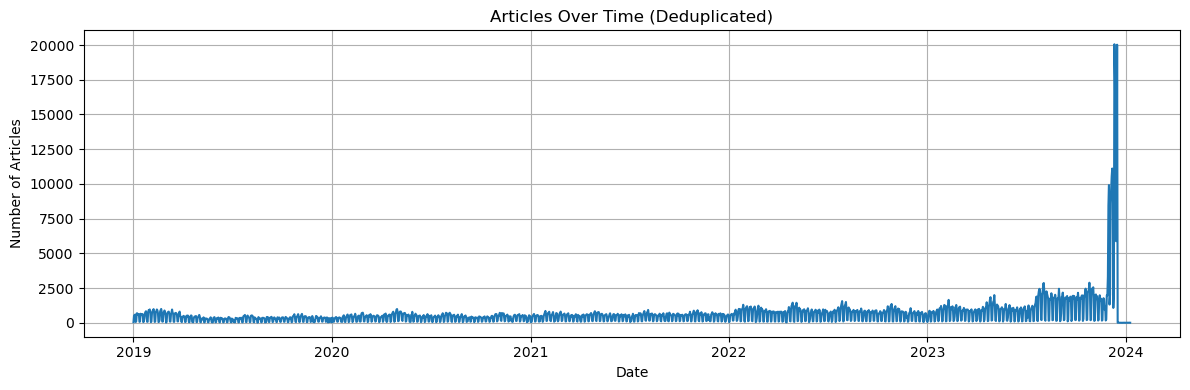

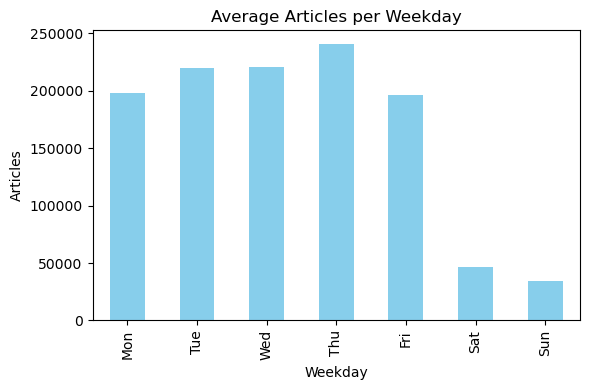


📈 Top 10 Most Mentioned Tickers:
TSLA     8995
GOOG     8722
ACGLO    8314
AAPL     8152
PFFL     8032
DIS      7965
BCDAW    7921
GRP-U    7882
INTC     7786
WMT      7744
dtype: int64

📉 Rare tickers mentioned once or twice: 232

🔢 Total unique stock tickers: 852


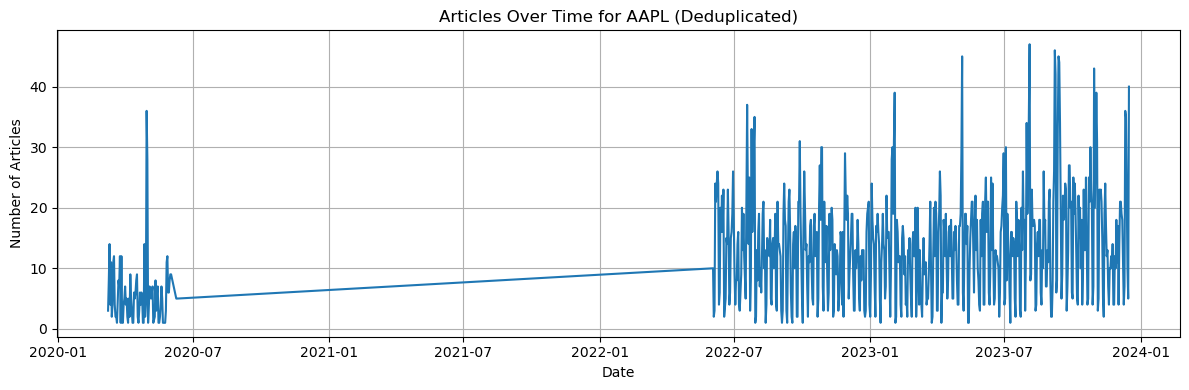

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
file_path = "FNS_Dataset_cleaned_deduped.csv"  # Deduplicated file
chunk_size = 100_000

# Containers
date_counts = {}
weekday_counts = [0] * 7  # Monday = 0 ... Sunday = 6
ticker_counts = {}
ticker_daily_counts = {}

# === Chunked Processing ===
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk = chunk.dropna(subset=['Date', 'Stock_symbol'])
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])

    # --- Date-based article count ---
    for date in chunk['Date']:
        date_only = date.date()
        date_counts[date_only] = date_counts.get(date_only, 0) + 1
        weekday_counts[date.weekday()] += 1

    # --- Stock ticker stats ---
    for row in chunk.itertuples():
        ticker = row.Stock_symbol
        date_only = row.Date.date()
        ticker_counts[ticker] = ticker_counts.get(ticker, 0) + 1

        if ticker not in ticker_daily_counts:
            ticker_daily_counts[ticker] = {}
        ticker_daily_counts[ticker][date_only] = ticker_daily_counts[ticker].get(date_only, 0) + 1

# === Create DataFrames ===
df_date = pd.Series(date_counts).sort_index()
df_weekday = pd.Series(weekday_counts, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df_ticker = pd.Series(ticker_counts).sort_values(ascending=False)

# === 📈 Plot: Distribution Over Time ===
plt.figure(figsize=(12, 4))
df_date.plot()
plt.title("Articles Over Time (Deduplicated)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.tight_layout()
plt.show()

# === 📅 Plot: Articles by Weekday ===
plt.figure(figsize=(6, 4))
df_weekday.plot(kind='bar', color='skyblue')
plt.title("Average Articles per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Articles")
plt.tight_layout()
plt.show()

# === 📈 Top 10 Most Frequent Tickers ===
print("\n📈 Top 10 Most Mentioned Tickers:")
print(df_ticker.head(10))

# === 📉 Rare Tickers (Mentioned Only Once or Twice) ===
rare_tickers = df_ticker[df_ticker <= 2]
print(f"\n📉 Rare tickers mentioned once or twice: {len(rare_tickers)}")

# === 🔢 Total Unique Tickers ===
print(f"\n🔢 Total unique stock tickers: {df_ticker.nunique()}")

# === 📊 Example: Articles per Ticker Over Time (e.g. AAPL) ===
ticker_to_plot = "AAPL"
if ticker_to_plot in ticker_daily_counts:
    ticker_df = pd.Series(ticker_daily_counts[ticker_to_plot]).sort_index()
    plt.figure(figsize=(12, 4))
    ticker_df.plot()
    plt.title(f"Articles Over Time for {ticker_to_plot} (Deduplicated)")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠️ Ticker '{ticker_to_plot}' not found in dataset.")


In [8]:
import pandas as pd

# File paths
file_path = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"
output_path = "FNS_Dataset_cleaned_deduped_title_article.csv"

# Chunk setup
chunk_size = 100_000
first_chunk = True

# Start chunked processing
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Drop rows with missing critical data
    chunk = chunk.dropna(subset=['Date', 'Article_title', 'Article'])

    # Convert 'Date' column
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])

    # Deduplicate by both title and article content
    chunk = chunk.drop_duplicates(subset=['Article_title', 'Article'])

    # Save cleaned chunk
    mode = 'w' if first_chunk else 'a'
    header = first_chunk
    chunk.to_csv(output_path, mode=mode, index=False, header=header)
    first_chunk = False

print("✅ Finished deduplicating by title and article content.")
print("💾 Saved to:", output_path)


✅ Finished deduplicating by title and article content.
💾 Saved to: FNS_Dataset_cleaned_deduped_title_article.csv


In [5]:
# Calculate daily average
average_articles_per_day = articles_per_day.mean()
print(f"\n📈 Average number of articles per day: {average_articles_per_day:.2f}")



📈 Average number of articles per day: 918.12


In [2]:
# View suspicious days with more than 10k articles
print(df_date[df_date > 10_000])

2023-11-30    15017
2023-12-01    24188
2023-12-04    21852
2023-12-05    23807
2023-12-06    26908
2023-12-07    28400
2023-12-08    23905
2023-12-11    54169
2023-12-12    49036
2023-12-13    30657
2023-12-14    18300
2023-12-15    19421
2023-12-16    47867
dtype: int64


In [3]:
import pandas as pd

# Suspicious spike date
suspicious_date = pd.to_datetime("2023-12-11").date()

# Re-scan and collect rows from that date
suspicious_articles = []

for chunk in pd.read_csv(file_path, chunksize=100_000):
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])
    chunk['date_only'] = chunk['Date'].dt.date
    filtered = chunk[chunk['date_only'] == suspicious_date]
    suspicious_articles.append(filtered)

# Combine them into a DataFrame
df_suspicious = pd.concat(suspicious_articles)

# Preview
print(f"🧠 Total articles on {suspicious_date}: {len(df_suspicious)}")
print("\n🔎 Top 20 Articles (title + stock):")
print(df_suspicious[['Stock_symbol', 'Article_title']].head(20))

# Check for duplicate titles
duplicate_titles = df_suspicious['Article_title'].duplicated().sum()
print(f"\n⚠️ Duplicate article titles on this day: {duplicate_titles}")


🧠 Total articles on 2023-12-11: 54169

🔎 Top 20 Articles (title + stock):
     Stock_symbol                                      Article_title
1198          AAL  S.Africa's Thungela says "not yet" cutting job...
1199          AAL  American Airlines (AAL) Stock Sinks As Market ...
1200          AAL        Validea Detailed Fundamental Analysis - AAL
1201          AAL  Tighter supplies to create tailwind for copper...
5950          AAN  The Aaron's Company, Inc. (AAN) Is a Trending ...
6171         AAOI  3 Tech Stocks That Have Crushed "Magnificent S...
6418          AAP                    AAP Quantitative Stock Analysis
6419          AAP  Noteworthy Tuesday Option Activity: GME, ETSY,...
7225         AAPL     Here’s What to Expect From Apple Stock in 2024
7226         AAPL  Goldman (GS) to Expand Private Credit, Reshuff...
7227         AAPL                         HYG, QGRW: Big ETF Inflows
7228         AAPL  The "Magnificent Seven" Stocks Crushed Wall St...
7229         AAPL            

In [4]:
import pandas as pd

# File paths
file_path = "/home/u762545/Thesis/Data/FNS_Dataset_preprocessed.csv"
output_path = "FNS_Dataset_cleaned_deduped.csv"

# Chunk setup
chunk_size = 100_000
first_chunk = True

# Start chunked processing
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Drop rows with missing critical data
    chunk = chunk.dropna(subset=['Date', 'Article_title'])

    # Convert 'Date' column
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])

    # Deduplicate by title (per chunk)
    chunk = chunk.drop_duplicates(subset=['Article_title'])

    # Save cleaned chunk
    mode = 'w' if first_chunk else 'a'
    header = first_chunk
    chunk.to_csv(output_path, mode=mode, index=False, header=header)
    first_chunk = False

print("✅ Finished deduplicating and saving to:", output_path)


✅ Finished deduplicating and saving to: FNS_Dataset_cleaned_deduped.csv



🧹 Dropped 13 days with more than 5000 articles.


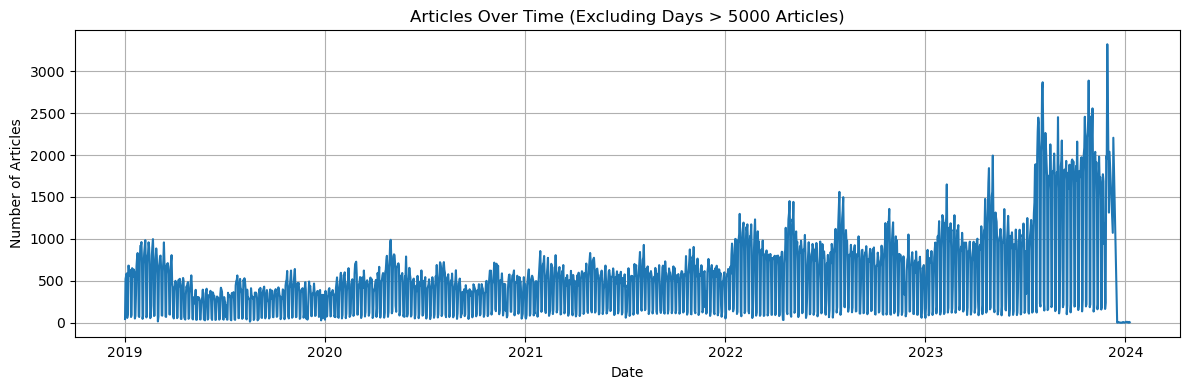

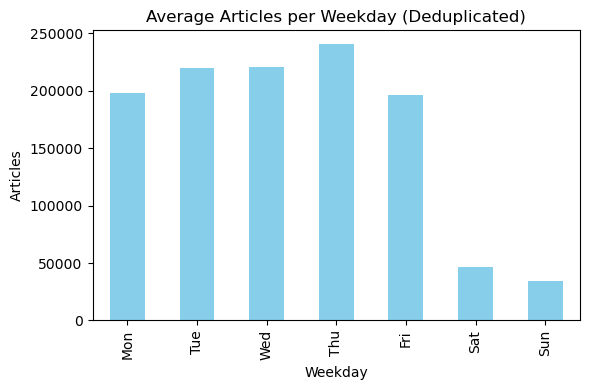


📈 Top 10 Most Mentioned Tickers:
TSLA     8995
GOOG     8722
ACGLO    8314
AAPL     8152
PFFL     8032
DIS      7965
BCDAW    7921
GRP-U    7882
INTC     7786
WMT      7744
dtype: int64

📉 Rare tickers mentioned once or twice: 232

🔢 Total unique stock tickers: 852


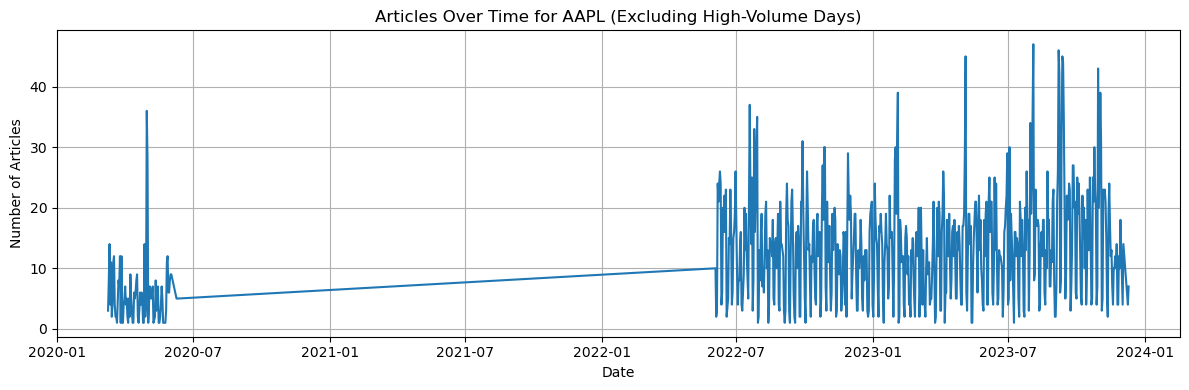


🧮 Total number of articles (after dropping missing dates/tickers): 1155547


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
file_path = "/home/u762545/Thesis/Data/FNS_Dataset_cleaned_deduped_title_article.csv"
chunk_size = 100_000

# Containers
date_counts = {}
weekday_counts = [0] * 7  # Monday = 0 ... Sunday = 6
ticker_counts = {}
ticker_daily_counts = {}

# === Chunked Processing ===
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk = chunk.dropna(subset=['Date', 'Stock_symbol'])
    chunk['Date'] = pd.to_datetime(chunk['Date'], errors='coerce')
    chunk = chunk.dropna(subset=['Date'])

    # --- Date-based article count ---
    for date in chunk['Date']:
        date_only = date.date()
        date_counts[date_only] = date_counts.get(date_only, 0) + 1
        weekday_counts[date.weekday()] += 1

    # --- Stock ticker stats ---
    for row in chunk.itertuples():
        ticker = row.Stock_symbol
        date_only = row.Date.date()
        ticker_counts[ticker] = ticker_counts.get(ticker, 0) + 1

        if ticker not in ticker_daily_counts:
            ticker_daily_counts[ticker] = {}
        ticker_daily_counts[ticker][date_only] = ticker_daily_counts[ticker].get(date_only, 0) + 1

# === Create DataFrames ===
df_date = pd.Series(date_counts).sort_index()
df_weekday = pd.Series(weekday_counts, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df_ticker = pd.Series(ticker_counts).sort_values(ascending=False)

# === 🚫 Drop Days with More Than 5000 Articles ===
drop_threshold = 5000
dates_to_drop = df_date[df_date > drop_threshold].index
df_date_filtered = df_date.drop(index=dates_to_drop)

# Report dropped days
print(f"\n🧹 Dropped {len(dates_to_drop)} days with more than {drop_threshold} articles.")

# === 📈 Plot: Distribution Over Time (Filtered) ===
plt.figure(figsize=(12, 4))
df_date_filtered.plot()
plt.title(f"Articles Over Time (Excluding Days > {drop_threshold} Articles)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.tight_layout()
plt.show()

# === 📅 Plot: Articles by Weekday ===
plt.figure(figsize=(6, 4))
df_weekday.plot(kind='bar', color='skyblue')
plt.title("Average Articles per Weekday (Deduplicated)")
plt.xlabel("Weekday")
plt.ylabel("Articles")
plt.tight_layout()
plt.show()

# === 📈 Top 10 Most Frequent Tickers ===
print("\n📈 Top 10 Most Mentioned Tickers:")
print(df_ticker.head(10))

# === 📉 Rare Tickers (Mentioned Only Once or Twice) ===
rare_tickers = df_ticker[df_ticker <= 2]
print(f"\n📉 Rare tickers mentioned once or twice: {len(rare_tickers)}")

# === 🔢 Total Unique Tickers ===
print(f"\n🔢 Total unique stock tickers: {df_ticker.nunique()}")

# === 📊 Example: Articles per Ticker Over Time (e.g. AAPL) ===
ticker_to_plot = "AAPL"
if ticker_to_plot in ticker_daily_counts:
    ticker_df = pd.Series(ticker_daily_counts[ticker_to_plot]).sort_index()
    ticker_df_filtered = ticker_df.drop(index=dates_to_drop, errors='ignore')

    plt.figure(figsize=(12, 4))
    ticker_df_filtered.plot()
    plt.title(f"Articles Over Time for {ticker_to_plot} (Excluding High-Volume Days)")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠️ Ticker '{ticker_to_plot}' not found in dataset.")

total_articles = sum(date_counts.values())
print(f"\n🧮 Total number of articles (after dropping missing dates/tickers): {total_articles}")